## NEED of DEEP RL 

There are several types of deep reinforcement learning (DEEP RL)  alogrithms , each with its own stenths and weekness. 
 -  Deep Q Networks (DQN):  A deep neural network is used to approximate the Q value function. DQN has been shown to perform well in environments with high dimensional states and discrete action spaces.
 -   Policy gradient Methods: Policy Gradient Methods directly optimize the agent's policy by using gradient ascent to maximize expected rewards based on sampled trajectories.
 -  Actor Critic methods: Actor-Critic methods combine policy-based (actor) and value-based (critic) approaches, where the actor updates the policy and the critic evaluates it using a value function to reduce variance and improve learning stability.

   


# DEEP Q learning  

- Deep Q learning is a type of reinforcement leanring  algorithm that uses deep neural networks to approximate in the Q learning in Q learning. It is an extension of Q learning and is often used when the state space is large or continuous.
- DQL replaces the Q table with a neural network that takes the state as input and outputs the q value for each possible action. 

## **Replay/ Experience Buffer**  

Experience Buffer is a technique used in reinforcement learning. particulerly in deep reinforcement learning  to store and randomly sample experience from the agents intereection with the environment. 
<br>  
Instead of using the most recent experiance to update the Q values the algorithms stores eperiences ina buffer and samples a random bath of experiance to update the Q values. 
<br>  
This helps in reducing the correlation between consecutive updates and sstabilizes the training process.  


## Here is the step by step explanition of the DQL algorithm 
- Initialize the replay buffer -  a data structure that stores the experiences of the agent
- initialize the Q network with random weights


In [1]:
import gym 
import numpy as np 
import matplotlib.pyplot as plt  
import random  
import os 


In [2]:
from keras.optimizers import Adam 
from keras.layers import Dense  
from keras.models import Sequential 
from collections import deque 

2025-07-03 21:23:07.297713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751577787.559687      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751577787.631884      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import numpy as np
import random
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import gym

class DQN: 
    def __init__(self, state_size, action_size): 
        self.memory = deque(maxlen=2500)  # Experience replay memory
        self.learning_rate = 0.001  # Learning rate for the optimizer
        self.epsilon = 1  # Exploration rate (epsilon-greedy policy)
        self.max_eps = 1  # Max epsilon value
        self.min_eps = 0.01  # Min epsilon value
        self.eps_decay = 0.0003  # Epsilon decay rate
        self.gamma = 0.9  # Discount factor
        self.state_size = state_size  # Size of the state space
        self.action_size = action_size  # Size of the action space (should be assigned properly)
        self.epsilon_lst = []  # List to store epsilon values over episodes
        self.model = self.built_model_dqn()  # Neural network model

    def built_model_dqn(self): 
        model = Sequential()  
        model.add(Dense(10, input_dim=self.state_size, activation='relu'))  # Input layer
        model.add(Dense(10, activation='relu'))  # Hidden layer
        model.add(Dense(self.action_size, activation='linear'))  # Output layer (no activation for Q-values)
        model.compile(loss="mse", optimizer=Adam(learning_rate=self.learning_rate))  # Mean squared error loss
        return model  

    def remember(self, state, action, reward, new_state, done):  
        self.memory.append((state, action, reward, new_state, done))  # Store the experience in memory

    def action(self, state):  
        if np.random.rand() > self.epsilon:  # Exploration
            return np.random.randint(0, self.action_size)  # Random action
        return np.argmax(self.model.predict(state))  # Exploitation (action with the highest Q-value)

    def pred(self, state):  
        return np.argmax(self.model.predict(state))  # Prediction of the best action

    def replay(self, batch_size, episode):  
        minibatch = random.sample(self.memory, batch_size)  # Sample a batch of experiences from memory
        for state, action, reward, new_state, done in minibatch: 
            target = reward 
            if not done:  # If the episode is not done, update the target Q-value
                target = reward + self.gamma * np.max(self.model.predict(new_state)) 
            target_f = self.model.predict(state)  # Predict Q-values for the current state
            
            # Ensure that action is an integer and target_f has the correct shape
            action = int(action)  # Make sure action is an integer
            
            # Check if target_f is 2D and has the correct shape
            if target_f.ndim == 2 and target_f.shape[1] == self.action_size:
                target_f[0][action] = target  # Update the Q-value for the taken action
            else:
                print(f"Unexpected shape for target_f: {target_f.shape}")
            
            # Fit the model with the updated Q-value
            self.model.fit(state, target_f, epochs=1, verbose=0)  

        if self.epsilon > self.min_eps:  # Epsilon decay
            self.epsilon = (self.max_eps - self.min_eps) * np.exp(-self.eps_decay * episode) + self.min_eps
        self.epsilon_lst.append(self.epsilon)  # Store the updated epsilon value


In [4]:
agent_ = DQN(state_size, action_size)      
reward_lst = []
for episode in range(episodes):
    state = env.reset()
    state_arr = np.zeros(state_size)
    state_arr[state] = 1
    state = np.reshape(state_arr, [1, state_size])
    reward = 0
    done = False
    for i in range(max_steps):
        #env.render()
        action = agent_.action(state)
        new_state, reward, done, info = env.step(action)
        new_state_arr = np.zeros(state_size)
        new_state_arr[new_state] = 1
        new_state = np.reshape(new_state_arr, [1, state_size])
        agent_.remember(new_state, reward, done, state, action)
        state = new_state
        
        if done:
            print(f"Episode: {episode:4}/{episodes} and step: {i:4}. Eps:{float(agent_.epsilon):.2}, reward {reward}")
            break
    reward_lst.append(reward)
    
    if len(agent_.memory) > batch_size:
        agent_.replay(batch_size)
        
print('Mean % Score = ', round(100*np.mean(reward_lst),1))

#Evaluation

eval_reward_lst = []
for episode in range(test):
    state = env.reset()
    state_arr = np.zeros(state_size)
    state_arr[state] = 1
    state = np.reshape(state_arr, [1, state_size])
    reward = 0
    done = False
    state_lst = []
    state_lst.append(state)
    for j in range(max_steps):
        #env.render()
        action = agent_.pred(state)
        new_state, reward, done, info = env.step(action)
        new_state_arr = np.zeros(state_size)
        new_state_arr[new_state] = 1
        new_state = np.reshape(new_state_arr, [1, state_size])
        state = new_state
        state_lst.append(state)
        
        if done:
            print(reward)
            break
    eval_reward_lst.append(reward)
print('Eval Mean % Score = ', round(100*np.mean(eval_reward_lst),1))


fig = plt.figure(figsize = (10, 12))
plt.rcParams.clear()
plt.rcParams.update({'font.szie': 22})
plt.subplot(311)
plt.scatter(list(range(len(reward_lst))), reward_lst, s=0.2)
plt.title("4X4 Fronzen Lake Result(DQN)")
plt.ylabel('Train Score')
plt.xlabel('Episode')
        
plt.subplot(312)
plt.scatter(list(range(len(agent_.epsilon_lst))), agent_.epsilon_lst, s=0.2)
plt.title("Epsilon")
plt.ylabel('Epsilon')
plt.xlabel('Episode')

plt.subplot(313)
plt.scatter(list(range(len(eval_reward_lst))), eval_reward_lst, s=0.2)
plt.title("Evaluation")
plt.ylabel('Test Score')
plt.xlabel('Episode')
plt.show()

NameError: name 'state_size' is not defined

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751577849.139001      35 gpu_device.cc:2022] Created d

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


I0000 00:00:1751577850.868712      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

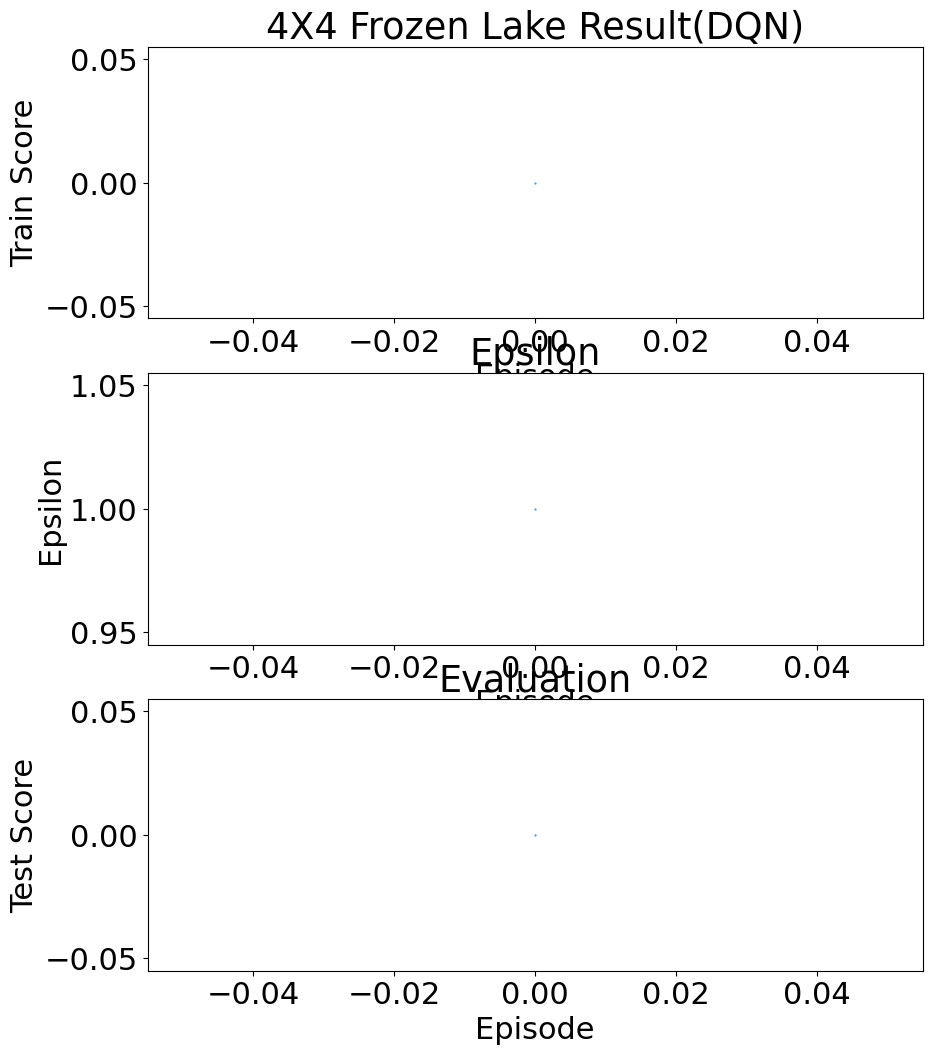

In [5]:
import numpy as np
import random
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import gym

class DQN:
    def __init__(self, state_size, action_size):
        self.memory = deque(maxlen=2500)  # Experience replay memory
        self.learning_rate = 0.001  # Learning rate for the optimizer
        self.epsilon = 1  # Exploration rate (epsilon-greedy policy)
        self.max_eps = 1  # Max epsilon value
        self.min_eps = 0.01  # Min epsilon value
        self.eps_decay = 0.0003  # Epsilon decay rate
        self.gamma = 0.9  # Discount factor
        self.state_size = state_size  # Size of the state space
        self.action_size = action_size  # Size of the action space (should be assigned properly)
        self.epsilon_lst = []  # List to store epsilon values over episodes
        self.model = self.built_model_dqn()  # Neural network model

    def built_model_dqn(self):
        model = Sequential()
        model.add(Dense(10, input_dim=self.state_size, activation='relu'))  # Input layer
        model.add(Dense(10, activation='relu'))  # Hidden layer
        model.add(Dense(self.action_size, activation='linear'))  # Output layer (no activation for Q-values)
        model.compile(loss="mse", optimizer=Adam(learning_rate=self.learning_rate))  # Mean squared error loss
        return model

    def remember(self, state, action, reward, new_state, done):
        self.memory.append((state, action, reward, new_state, done))  # Store the experience in memory

    def action(self, state):
        if np.random.rand() > self.epsilon:  # Exploration
            return np.random.randint(0, self.action_size)  # Random action
        return np.argmax(self.model.predict(state))  # Exploitation (action with the highest Q-value)

    def pred(self, state):
        return np.argmax(self.model.predict(state))  # Prediction of the best action

    def replay(self, batch_size, episode):
        minibatch = random.sample(self.memory, batch_size)  # Sample a batch of experiences from memory
        for state, action, reward, new_state, done in minibatch:
            target = reward
            if not done:  # If the episode is not done, update the target Q-value
                target = reward + self.gamma * np.max(self.model.predict(new_state))
            target_f = self.model.predict(state)  # Predict Q-values for the current state
            
            # Ensure that action is an integer and target_f has the correct shape
            action = int(action)  # Make sure action is an integer
            
            # Check if target_f is 2D and has the correct shape
            if target_f.ndim == 2 and target_f.shape[1] == self.action_size:
                target_f[0][action] = target  # Update the Q-value for the taken action
            else:
                print(f"Unexpected shape for target_f: {target_f.shape}")

            self.model.fit(state, target_f, epochs=1, verbose=0)  # Train the model with the updated Q-value

        if self.epsilon > self.min_eps:  # Epsilon decay
            self.epsilon = (self.max_eps - self.min_eps) * np.exp(-self.eps_decay * episode) + self.min_eps
        self.epsilon_lst.append(self.epsilon)  # Store the updated epsilon value


# Environment Setup
env = gym.make("FrozenLake-v1", is_slippery=False)

# Parameters
episodes = 1 #10000
test = 1
max_steps = 50 
state_size = env.observation_space.n
action_size = env.action_space.n
batch_size = 32

# Create agent
agent_ = DQN(state_size, action_size)

# Training loop
reward_lst = []
for episode in range(episodes):
    state = env.reset()
    state_arr = np.zeros(state_size)
    state_arr[state] = 1
    state = np.reshape(state_arr, [1, state_size])
    reward = 0
    done = False
    for i in range(max_steps):
        action = agent_.action(state)
        new_state, reward, done, info = env.step(action)
        new_state_arr = np.zeros(state_size)
        new_state_arr[new_state] = 1
        new_state = np.reshape(new_state_arr, [1, state_size])
        agent_.remember(new_state, reward, done, state, action)
        state = new_state
        
        if done:
            print(f"Episode: {episode:4}/{episodes} and step: {i:4}. Eps:{float(agent_.epsilon):.2}, reward {reward}")
            break
    reward_lst.append(reward)
    
    if len(agent_.memory) > batch_size:
        # Pass both batch_size and episode to replay
        agent_.replay(batch_size, episode)

print('Mean % Score = ', round(100*np.mean(reward_lst),1))

# Evaluation loop
eval_reward_lst = []
for episode in range(test):
    state = env.reset()
    state_arr = np.zeros(state_size)
    state_arr[state] = 1
    state = np.reshape(state_arr, [1, state_size])
    reward = 0
    done = False
    for j in range(max_steps):
        action = agent_.pred(state)
        new_state, reward, done, info = env.step(action)
        new_state_arr = np.zeros(state_size)
        new_state_arr[new_state] = 1
        new_state = np.reshape(new_state_arr, [1, state_size])
        state = new_state
        
        if done:
            print(reward)
            break
    eval_reward_lst.append(reward)

print('Eval Mean % Score = ', round(100*np.mean(eval_reward_lst),1))

# Plot results
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 12))
plt.rcParams.clear()
plt.rcParams.update({'font.size': 22})

# Training score plot
plt.subplot(311)
plt.scatter(list(range(len(reward_lst))), reward_lst, s=0.2)
plt.title("4X4 Frozen Lake Result(DQN)")
plt.ylabel('Train Score')
plt.xlabel('Episode')

# Epsilon plot
plt.subplot(312)
plt.scatter(list(range(len(agent_.epsilon_lst))), agent_.epsilon_lst, s=0.2)
plt.title("Epsilon")
plt.ylabel('Epsilon')
plt.xlabel('Episode')

# Evaluation score plot
plt.subplot(313)
plt.scatter(list(range(len(eval_reward_lst))), eval_reward_lst, s=0.2)
plt.title("Evaluation")
plt.ylabel('Test Score')
plt.xlabel('Episode')

plt.show()


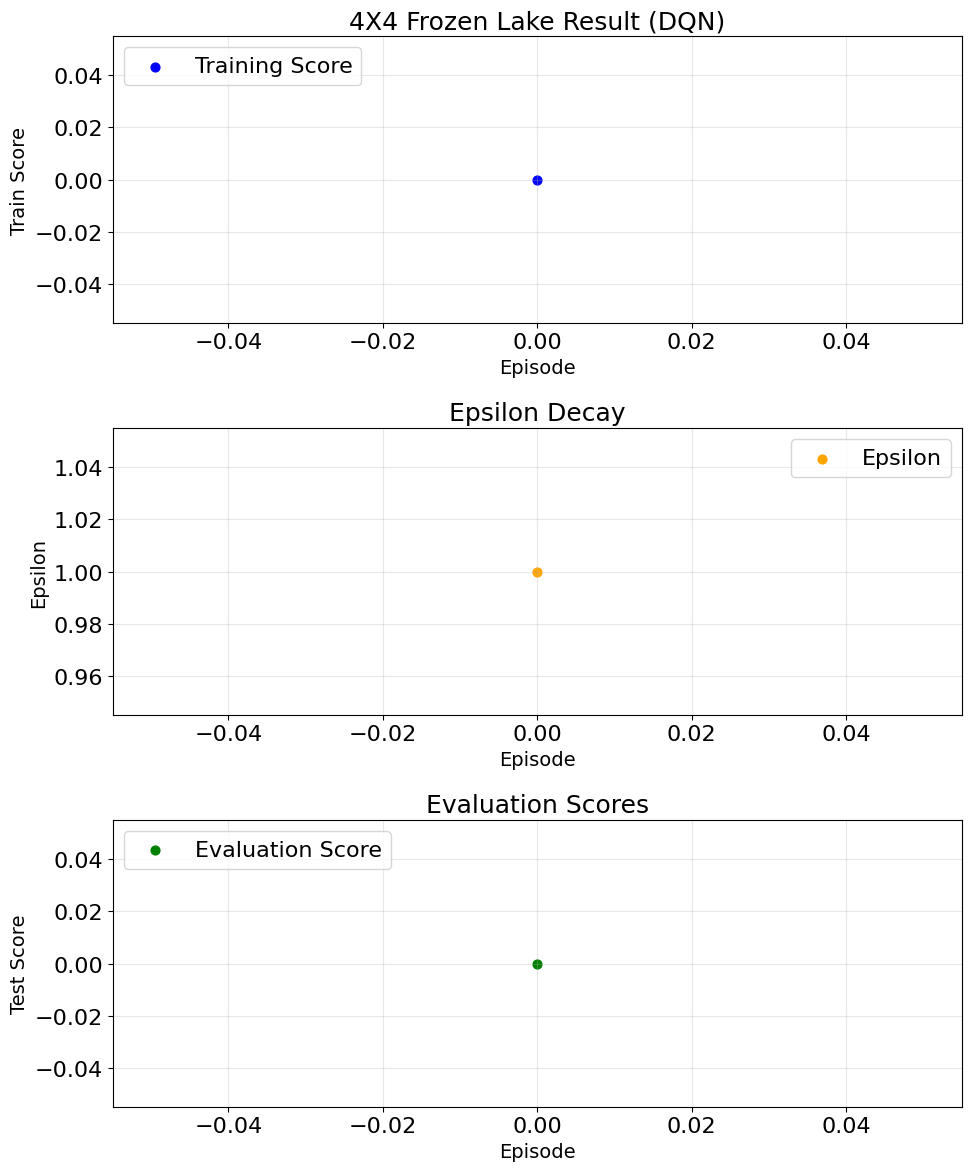

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 12))

# Update the style of the plot
plt.rcParams.update({'font.size': 16, 'lines.linewidth': 2, 'grid.alpha': 0.3})

# Training score plot
plt.subplot(311)
plt.scatter(list(range(len(reward_lst))), reward_lst, s=40, color='blue', label="Training Score")
plt.title("4X4 Frozen Lake Result (DQN)", fontsize=18)
plt.ylabel('Train Score', fontsize=14)
plt.xlabel('Episode', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left')

# Epsilon plot
plt.subplot(312)
plt.scatter(list(range(len(agent_.epsilon_lst))), agent_.epsilon_lst, s=40, color='orange', label="Epsilon")
plt.title("Epsilon Decay", fontsize=18)
plt.ylabel('Epsilon', fontsize=14)
plt.xlabel('Episode', fontsize=14)
plt.grid(True)
plt.legend(loc='upper right')

# Evaluation score plot
plt.subplot(313)
plt.scatter(list(range(len(eval_reward_lst))), eval_reward_lst, s=40, color='green', label="Evaluation Score")
plt.title("Evaluation Scores", fontsize=18)
plt.ylabel('Test Score', fontsize=14)
plt.xlabel('Episode', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left')

# Display the plots
plt.tight_layout()  # To ensure that the subplots do not overlap
plt.show()
